In [2]:
import requests
import codecs
import json
import pandas as pd

In [3]:
df = pd.read_json("/home/laampt/nlp/data/private/df_test.json")

In [49]:
df.head(5)

,Doc,Doc_Clean,Num_Words,Target
0,"Công bố kết quả kiểm tra, giám sát, đôn đốc cô...",công_bố kết_quả kiểm_tra giám_sát đôn_đốc công...,708,0
1,VTV1 KHÉO LÉO QUẢNG BÁ CUỘC GẶP CỦA TỔNG THỐNG...,vtv1 khéo_léo quảng_bá cuộc gặp của tổng_thống...,97,1
10,"Đẩy mạnh xoá đói, giảm nghèo, hạn chế phân hoá...",đẩy_mạnh xoá đói giảm nghèo hạn_chế phân_hoá g...,1136,0
100,CON CỦA THỦ TƯỚNG NGUYỄN TẤN DŨNG\n\n Chúng tô...,con của thủ_tướng nguyễn tấn dũng chúng_tôi bắ...,1249,1
101,Dốc toàn lực tìm người mất tích vụ tai nạn lò ...,dốc toàn lực tìm người mất_tích vụ tai_nạn lò ...,303,0


In [52]:
print df.Doc[133]
print '-' * 80
print df.Doc_Clean[133]
print '-' * 80
print df.Target[133]

Giá dầu tại thị trường Mỹ giảm hơn 4% trong phiên giao dịch mới đây, chạm mức thấp nhất kể từ đầu năm do cung vượt quá cầu.

Hãng tin Reuters đưa tin, các chỉ số trên thị trường năng lượng Mỹ đều sụt giảm, các giao dịch ở Phố Wall (Wall Street) kém sôi động mặc dù tại thời điểm này là mùa tiêu thụ năng lượng cao nhất trong năm tại Mỹ.

Giá dầu Mỹ hồi phục chậm sau khi chạm đáy của 6 năm rưỡi hồi đầu tuần do lo ngại về tăng trưởng kinh tế của Trung Quốc.

gia dau xuong thap nhat ke tu dau nam hinh 0
Giá dầu xuống thấp nhất kể từ đầu năm.
Giá dầu WTI giao tháng 9/2015 hiện đang ở mức 41,14 USD/thùng, trong khi đó giá dầu WTI giao tháng 10 tăng lên 41,32 USD/thùng.

Đáng chú ý, giá dầu Brent giao tháng 10/2015 tiếp tục giảm 54 cent, tương đương 1,1%, xuống còn 46,62 USD/thùng – mức thấp nhất kể từ tháng 1/2015.

Các chuyên gia nhận định, giá dầu Mỹ giảm mạnh trong các phiên gần đây sau khi số liệu của Cơ quan Thông tin Năng lượng Mỹ (EIA) cho thấy lượng dầu lưu kho của Mỹ tuần qua b

In [9]:
test_labels = df.Target.values
test_docs = df.Doc_Clean.values

In [10]:
api_predict = "http://192.168.0.101:9000/docsent/api/v4/predict?input="

In [38]:
predictions = []
for i, doc in enumerate(test_docs):
    print "Progress at {}".format(i)
    if not (doc): 
        prediction = 0
    else:
        rq = requests.get(api_predict + doc.encode('utf-8'))
        result = json.loads(rq.content)
        prediction = result['predictions'][0][1]
    predictions.append(prediction)

Progress at 0
Progress at 1
Progress at 2
Progress at 3
Progress at 4
Progress at 5
Progress at 6
Progress at 7
Progress at 8
Progress at 9
Progress at 10
Progress at 11
Progress at 12
Progress at 13
Progress at 14
Progress at 15
Progress at 16
Progress at 17
Progress at 18
Progress at 19
Progress at 20
Progress at 21
Progress at 22
Progress at 23
Progress at 24
Progress at 25
Progress at 26
Progress at 27
Progress at 28
Progress at 29
Progress at 30
Progress at 31
Progress at 32
Progress at 33
Progress at 34
Progress at 35
Progress at 36
Progress at 37
Progress at 38
Progress at 39
Progress at 40
Progress at 41
Progress at 42
Progress at 43
Progress at 44
Progress at 45
Progress at 46
Progress at 47
Progress at 48
Progress at 49
Progress at 50
Progress at 51
Progress at 52
Progress at 53
Progress at 54
Progress at 55
Progress at 56
Progress at 57
Progress at 58
Progress at 59
Progress at 60
Progress at 61
Progress at 62
Progress at 63
Progress at 64
Progress at 65
Progress at 66
Progr

In [39]:
from sklearn import metrics
import numpy as np

In [40]:
print 'Mega Combinator:\n{}'.format(metrics.classification_report(test_labels, np.array(predictions)))

Mega Combinator:
             precision    recall  f1-score   support

          0       0.94      0.83      0.88        81
          1       0.80      0.93      0.86        59

avg / total       0.88      0.87      0.87       140



In [41]:
print 'Mega Combinator AUC:\n{}'.format(metrics.roc_auc_score(test_labels, np.array(predictions)))

Mega Combinator AUC:
0.879681941829


In [45]:
%matplotlib inline 

import matplotlib as mlp
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight') # Good looking plots
pd.set_option('display.max_columns', None) # Display any number of columns

import seaborn as sns

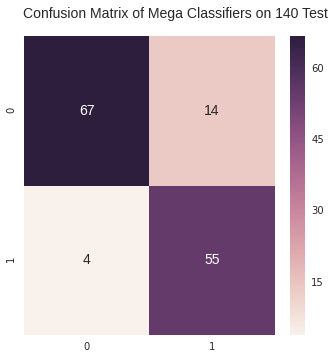

In [48]:
cm = metrics.confusion_matrix(test_labels, np.array(predictions))

fix, ax = plt.subplots(figsize=(5, 5))
plt.suptitle('Confusion Matrix of Mega Classifiers on 140 Test ')
plt.subplot(1, 1, 1)
sns.heatmap(cm, annot=True,  fmt='');

In [56]:
for i, label in enumerate(predictions):
    if predictions[i] != test_labels[i]: 
        print test_docs[i]
        print ">> True: {} | Predict: {}".format(test_labels[i], predictions[i])
        print '-' * 80

đảng đã cho ta một mùa_xuân đầy ước_vọng một mùa_xuân tươi tràn ánh_sáng khắp nơi_nơi đảng đã đem về tuổi_xuân cho nước non vang tiếng_hát ca chứa_chan niềm yêu_đời bao năm khổ_đau đất_nước ta không mùa_xuân cuộc_đời tăm_tối chốn lao_tù bao hờn căm vừng dương hé_sáng khi khắp nơi ta có đảng bóng_tối lui dần tiếng chim vui hót vang và rồi từ đây ánh dương soi đời_mới tiến theo cờ đảng đã thấy tương_lai sáng tươi đảng đã cho ta cả mùa_xuân của cuộc_đời đảng truyền cho ta một niềm_tin ở tương_lai đảng đã mang lại tình_yêu thương khắp nơi thế_giới quanh ta hân_hoan ngàn tiếng_cười xua đi màn_đêm chiến_tranh gieo bao khổ_đau cuộc_đời từ nay sẽ sáng tươi như mùa_xuân vượt mọi gian_khó ta tiến lên đi theo đảng băng_giá tan dần ánh dương càng huy_hoàng bạn ơi mùa_xuân khắp nơi tươi_đẹp quá khi lý_tưởng đảng rực sáng trong tim chúng ta.
>> True: 0 | Predict: 1
--------------------------------------------------------------------------------
bác_sĩ bv bình_chánh nộp wwnumberww triệu đồng quà_tặng